In [12]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('Train.csv')
train.shape

#so the TRAIN data has 8523 rows and 12 columns

(8523, 12)

In [3]:
# get the list of all columns in TRAIN data
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
# finding out the datatype of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#we shall separate the categorical and numeric columns
cat_data = []
num_data = []

for i,c in enumerate(train.dtypes):
    print(i,c)
    if c == object or c == int:
        cat_data.append(train.iloc[:, i])
    else :
        num_data.append(train.iloc[:, i])

cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()
cat_data.head()

0 object
1 float64
2 object
3 float64
4 object
5 float64
6 object
7 int64
8 object
9 object
10 object
11 float64


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
import pandas_profiling as pp

report = pp.ProfileReport(train)
report

From the analysis above, we have the following information :
1. Item_Weight has 1463 (17.2%) missing values
2. Outlet_Size has 2410 (28.3%) missing values
3. Item Fat content has a naming issue, we need to convert LF & low fat to Low Fat, and reg to Regular
4. Cramer's V statistics shows that Outlet_Size, Outlet_type, Outlet_location_type and Outlet Identifier are well correlated

Treating the Item_Fat_Content column

In [7]:
cat_data.Item_Fat_Content.unique()
cat_data['Item_Fat_Content'] = cat_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat','reg': 'Regular'})
print(cat_data.Item_Fat_Content.unique())
cat_data.head()
##now we see that we now have only two unique Fat_content types

train = pd.concat([cat_data,num_data], axis = 1)
train.head()
train.shape

['Low Fat' 'Regular']


(8523, 12)

# Visualizations

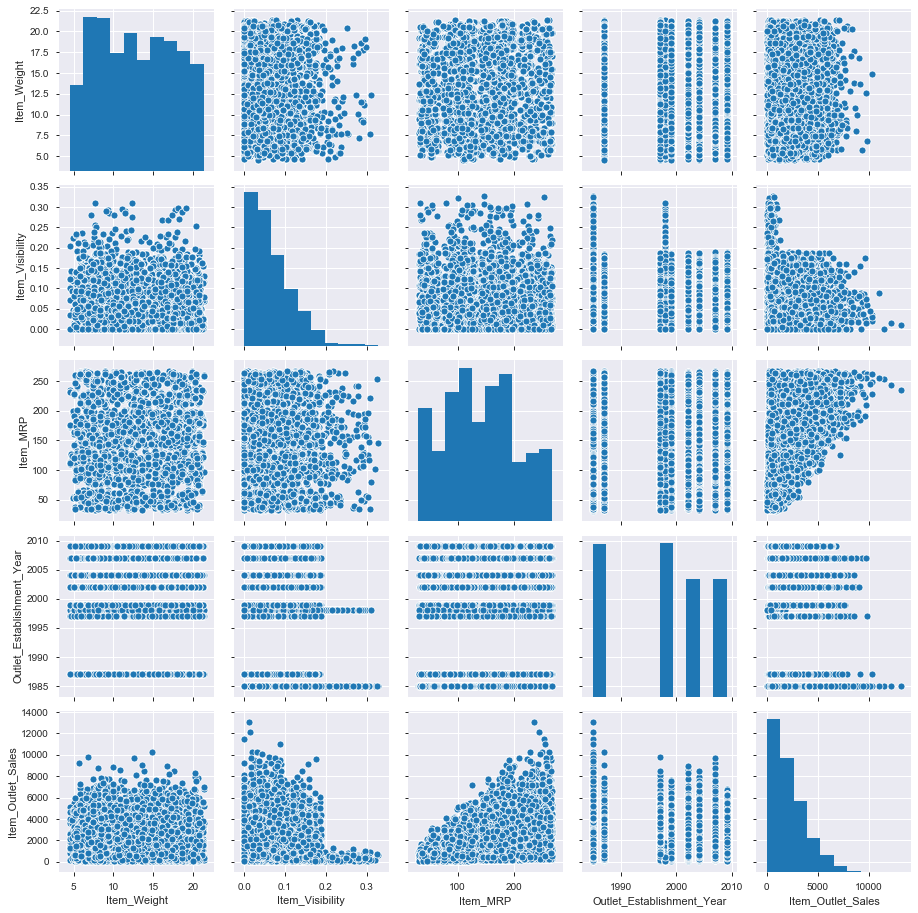

In [13]:
sns.pairplot(train)

In [10]:
num_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


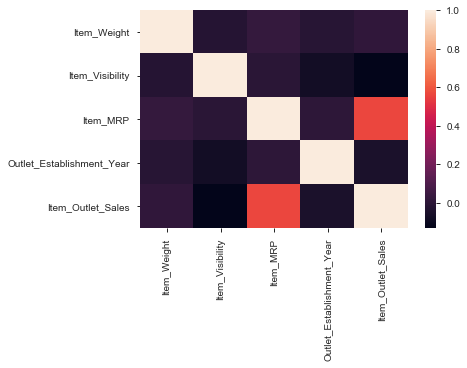

In [14]:
b = sns.heatmap(num_data.corr())
b

In [15]:
# i.e. **The Total_Sales of Outlets is Price sensitive**

In [16]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


*In the above summary, I smell an opportunity to try and bin the Item_weight columns and even Item_visibility.
We shall not bin Item_MRP because in our prior analysis we observed a good correlation between Tem_MRP and Outlet_Sales.*

In [17]:
cat_data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


In [18]:
cat_data['Item_Identifier'].value_counts()
cat_data = cat_data.drop(['Item_Identifier'], axis=1)
cat_data.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
for i in cat_data.columns:
    print()
    print(i)
    print(cat_data[i].value_counts())
    print()
    print()


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64



Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier
OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64



Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64



Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dt

From the above output we can infer about the most common classes in each Categorical column

Relationship between 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales' and Outlet_Location_Type

Item_Fat_Content

Item_Weight vs Item_Fat_Content


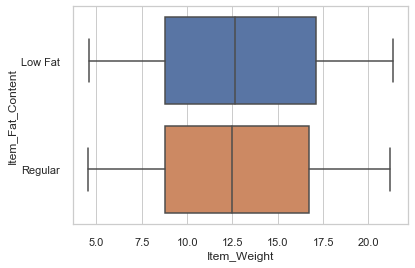

Item_Visibility vs Item_Fat_Content


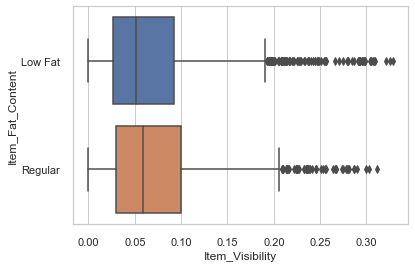

Item_MRP vs Item_Fat_Content


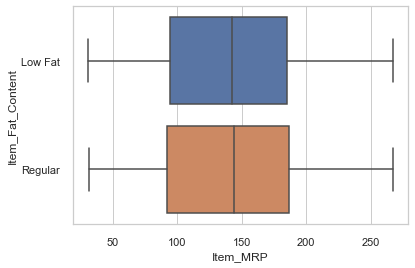

Outlet_Establishment_Year vs Item_Fat_Content


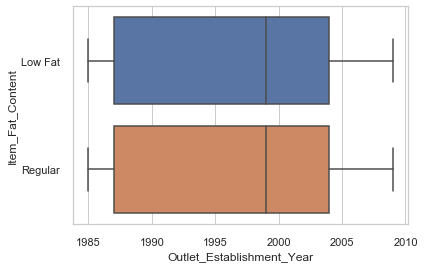

Item_Outlet_Sales vs Item_Fat_Content


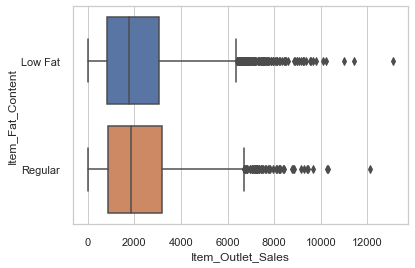

Item_Type

Item_Weight vs Item_Type


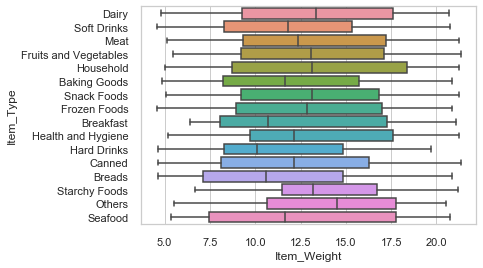

Item_Visibility vs Item_Type


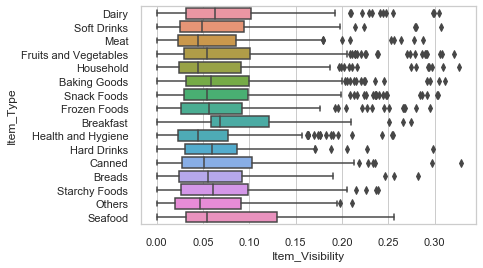

Item_MRP vs Item_Type


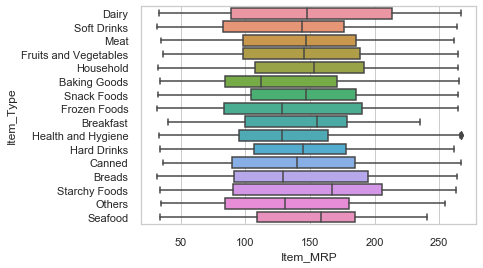

Outlet_Establishment_Year vs Item_Type


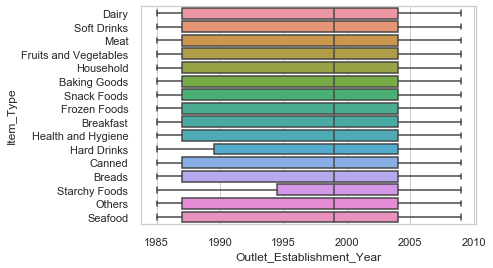

Item_Outlet_Sales vs Item_Type


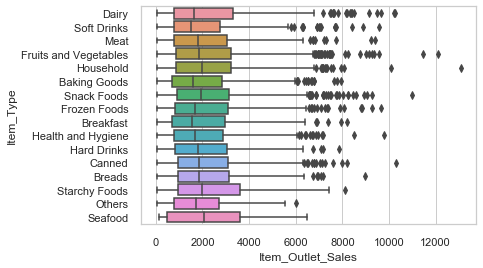

Outlet_Identifier

Item_Weight vs Outlet_Identifier


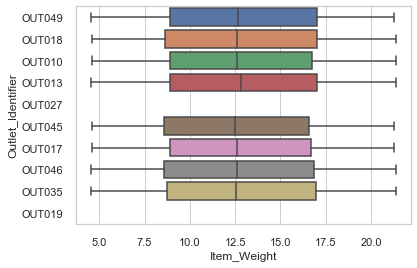

Item_Visibility vs Outlet_Identifier


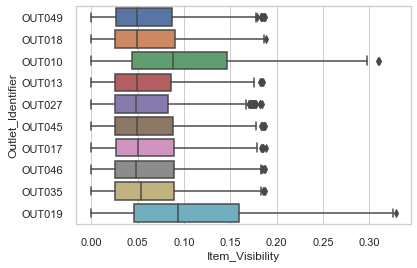

Item_MRP vs Outlet_Identifier


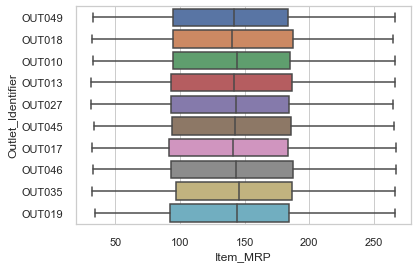

Outlet_Establishment_Year vs Outlet_Identifier


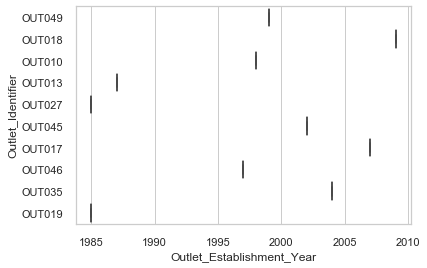

Item_Outlet_Sales vs Outlet_Identifier


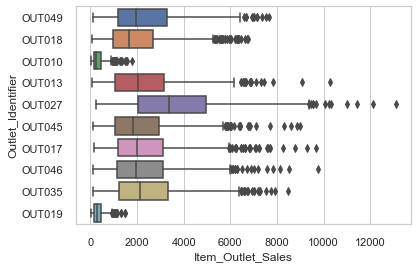

Outlet_Size

Item_Weight vs Outlet_Size


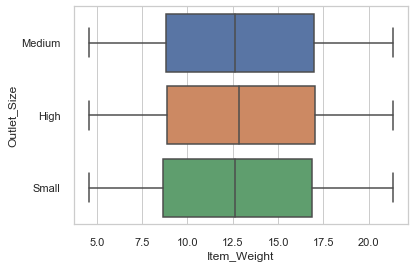

Item_Visibility vs Outlet_Size


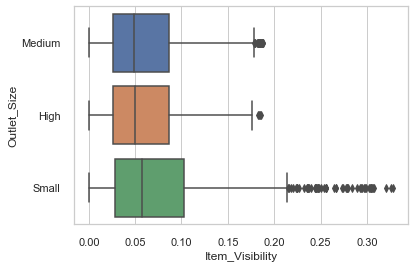

Item_MRP vs Outlet_Size


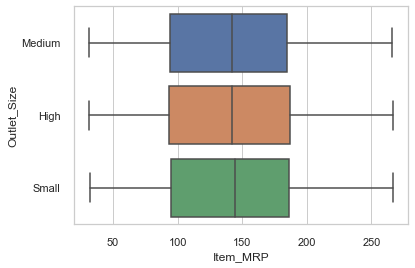

Outlet_Establishment_Year vs Outlet_Size


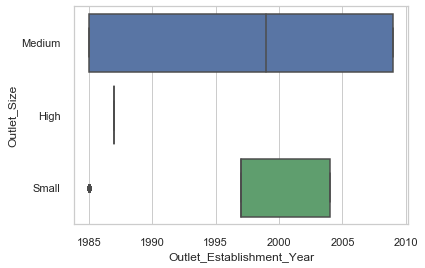

Item_Outlet_Sales vs Outlet_Size


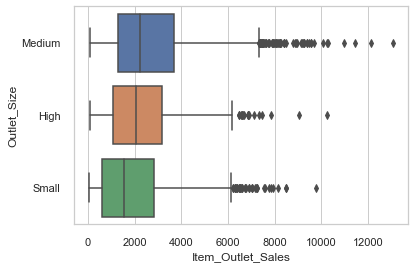

Outlet_Location_Type

Item_Weight vs Outlet_Location_Type


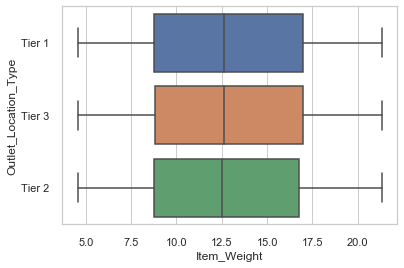

Item_Visibility vs Outlet_Location_Type


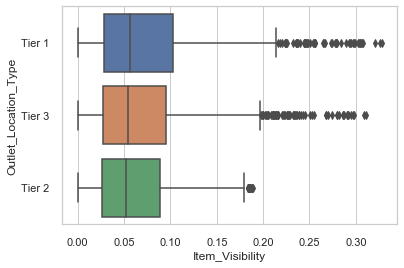

Item_MRP vs Outlet_Location_Type


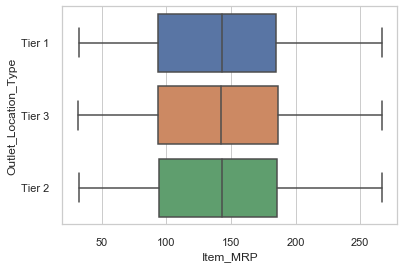

Outlet_Establishment_Year vs Outlet_Location_Type


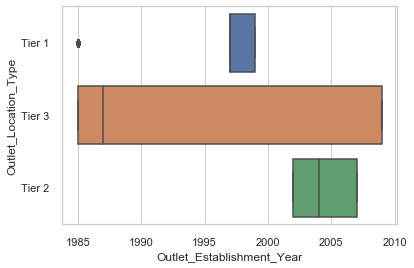

Item_Outlet_Sales vs Outlet_Location_Type


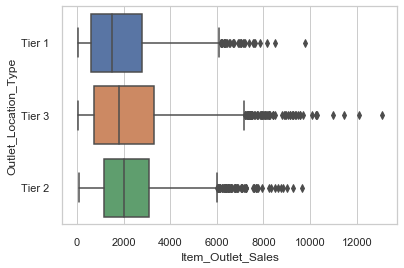

Outlet_Type

Item_Weight vs Outlet_Type


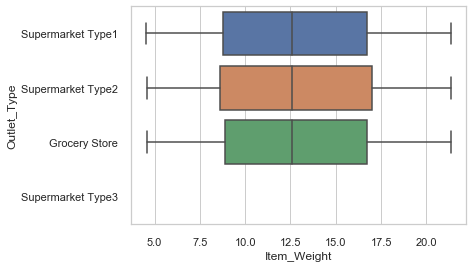

Item_Visibility vs Outlet_Type


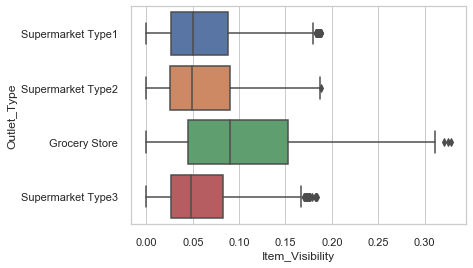

Item_MRP vs Outlet_Type


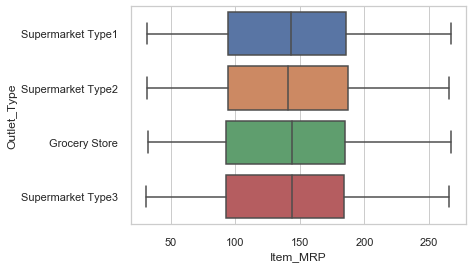

Outlet_Establishment_Year vs Outlet_Type


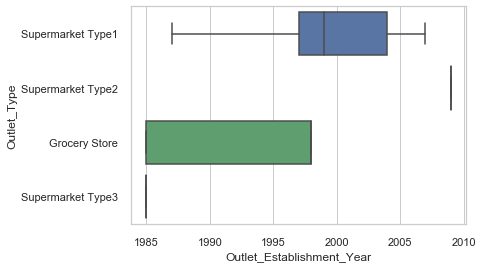

Item_Outlet_Sales vs Outlet_Type


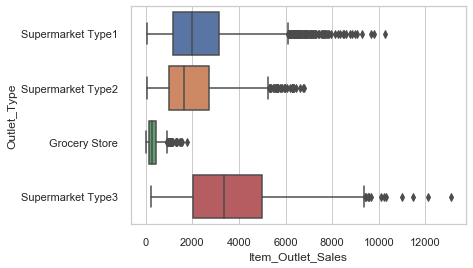

In [20]:
cat_columns = cat_data.columns
cat_columns = list(cat_columns)
cat_columns_new = cat_columns


for cat in cat_columns_new:
    print(cat)
    print()
    for i in num_data.columns:
        print(i, "vs", cat)
        sns.set(style="whitegrid")
        sns.boxplot(train[i], train[cat])
        plt.show()

Item_Outlet_Sales in Thousands ('000)

--------------------Item_Fat_Content  vs  Item_Outlet_Sales--------------------


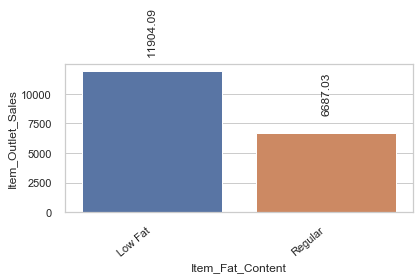


Maximum Sales : 
                  Item_Outlet_Sales
Item_Fat_Content                   
Low Fat                11904.094533

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Item_Type  vs  Item_Outlet_Sales--------------------


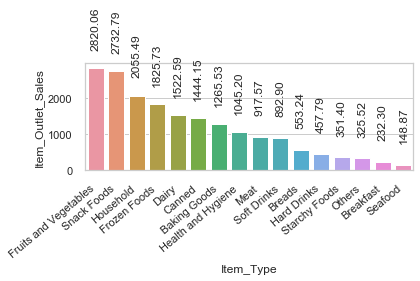


Maximum Sales : 
                       Item_Outlet_Sales
Item_Type                               
Fruits and Vegetables        2820.059817

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Outlet_Identifier  vs  Item_Outlet_Sales--------------------


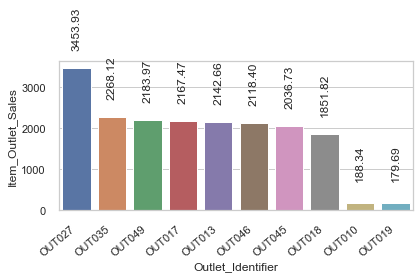


Maximum Sales : 
                   Item_Outlet_Sales
Outlet_Identifier                   
OUT027                   3453.926051

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Outlet_Size  vs  Item_Outlet_Sales--------------------


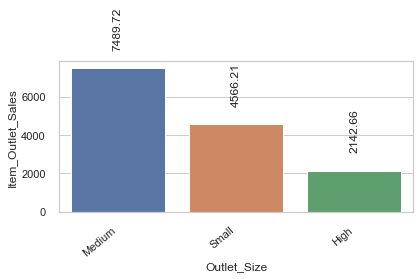


Maximum Sales : 
             Item_Outlet_Sales
Outlet_Size                   
Medium             7489.718692

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Outlet_Location_Type  vs  Item_Outlet_Sales--------------------


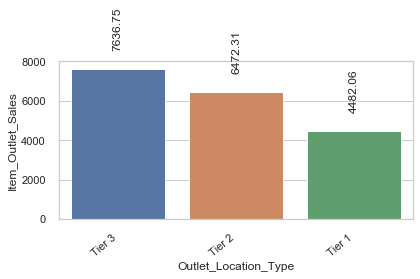


Maximum Sales : 
                      Item_Outlet_Sales
Outlet_Location_Type                   
Tier 3                      7636.752632

--------------------------------------------------
Item_Outlet_Sales in Thousands ('000)

--------------------Outlet_Type  vs  Item_Outlet_Sales--------------------


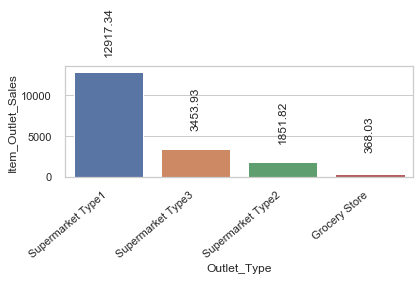


Maximum Sales : 
                   Item_Outlet_Sales
Outlet_Type                         
Supermarket Type1       12917.342263

--------------------------------------------------


In [21]:
## 1. Which class in each category corresponds to maximum sales

for cat in cat_data.columns:
    print("Item_Outlet_Sales in Thousands ('000)")
    print()
    print("-"*20 + cat + '  vs' + '  Item_Outlet_Sales' + "-"*20)
    output = train[[cat,'Item_Outlet_Sales']].groupby([cat]).apply(lambda x: x['Item_Outlet_Sales'].sum()/1000).sort_values(ascending=False)
    output = pd.DataFrame(output)
    output.columns = ['Item_Outlet_Sales']
    ax = sns.barplot(output.index,'Item_Outlet_Sales', data =output)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/ 2., p.get_height()),ha='center', va='center', rotation=90, xytext=(0,40), textcoords='offset points')  #vertical bars
    plt.tight_layout()
    plt.show()
    print()
    print("Maximum Sales : ")
    print(output.head(1))
    print()
    print("-" *50)

The visuals above gives us the information above the Total sales for each class of each category.

Some of the key information is stated below:
1. SuperMarket Type 1 correspond to Max. sales i.e 12917.34 (in thousands)
2. Tier 3 locations have max sales to the tune of 7636.75 (in thousands)
3. Outlets with medium size have max sales to the tune of 7489.72 (in thousands)
4. Outlet OUT027 has the max sales of 3453.9 (in thousands)
5. People purchase Fruits and Vegetables the most and second comes Snacks
6. Low fat goods sell the most

In [22]:
# 2. The Outlet corresponding to max and min sales and the possible reason for those sales

cat_data.describe()
train.groupby(['Outlet_Identifier','Outlet_Establishment_Year']).size().reset_index(name='Freq')
#train['Outlet_Identifier'].unique()
#train['Outlet_Establishment_Year'].unique()

,Outlet_Identifier,Outlet_Establishment_Year,Freq
0,OUT010,1998.0,555
1,OUT013,1987.0,932
2,OUT017,2007.0,926
3,OUT018,2009.0,928
4,OUT019,1985.0,528
5,OUT027,1985.0,935
6,OUT035,2004.0,930
7,OUT045,2002.0,929
8,OUT046,1997.0,930
9,OUT049,1999.0,930


In [23]:
train.columns
year_store_sales = train[['Outlet_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales']].groupby(['Outlet_Identifier','Outlet_Establishment_Year']).apply(lambda x: x['Item_Outlet_Sales'].sum()/1000).sort_values(ascending=False)
year_store_sales = pd.DataFrame(year_store_sales)
year_store_sales.columns = ['Outlet_Sales']
year_store_sales

,,Outlet_Sales
Outlet_Identifier,Outlet_Establishment_Year,
OUT027,1985.0,3453.926051
OUT035,2004.0,2268.122935
OUT049,1999.0,2183.969810
OUT017,2007.0,2167.465294
OUT013,1987.0,2142.663578
OUT046,1997.0,2118.395168
OUT045,2002.0,2036.725477
OUT018,2009.0,1851.822830
OUT010,1998.0,188.340172


From the above analysis we infer that Outlet OUT027 and OUT019 were established in the same year but 27 has max sales whereas 19 is at the bottom.

*Furthermore, we can see that OUT035,OUT017 has good sales given their Establishment year.* 

In [24]:
#To find out the reason for the above case we can act smart and subset data on the Outlet_Identifier and
#then remove duplicates (assuming that an outlet will be at only one location)

outlets = train[['Outlet_Identifier',"Outlet_Size","Outlet_Location_Type","Outlet_Type"]]
print(outlets.head())
print()
print("Before removing NA : " , outlets.shape)

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type
0            OUT049      Medium               Tier 1  Supermarket Type1
1            OUT018      Medium               Tier 3  Supermarket Type2
2            OUT049      Medium               Tier 1  Supermarket Type1
3            OUT010         NaN               Tier 3      Grocery Store
4            OUT013        High               Tier 3  Supermarket Type1

Before removing NA :  (8523, 4)


In [25]:
# removing duplicates
outlets_new = outlets.drop_duplicates(subset=['Outlet_Identifier'])
outlets_new

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,Medium,Tier 1,Supermarket Type1
1,OUT018,Medium,Tier 3,Supermarket Type2
3,OUT010,NaN,Tier 3,Grocery Store
4,OUT013,High,Tier 3,Supermarket Type1
7,OUT027,Medium,Tier 3,Supermarket Type3
8,OUT045,NaN,Tier 2,Supermarket Type1
9,OUT017,NaN,Tier 2,Supermarket Type1
11,OUT046,Small,Tier 1,Supermarket Type1
19,OUT035,Small,Tier 2,Supermarket Type1
23,OUT019,Small,Tier 1,Grocery Store


From the above analysis we infer that among Oultlet 17,19,35,17
-- Other than Outlet 19 all the other 3 top Sales outlets are Supermarkets (2 of type 1 and 1 of Type 3)
-- Also, along with this, we now have an the info that Outlet10, Outlet45, Outlet17  doesnt have a mentioned Outlet Size, and these correspond t0 2410 rows i.e around 28% of the total rows.

Now we have two options to solve this situation. Either we can drop Outlet_Size or try and impute the blank cells with some logical values

We shall tackle this while imputation

In [26]:
train[train.Outlet_Identifier.isin(['OUT010', "OUT045", "OUT017"])].shape[0] / train.shape[0]

0.2827642848762173

In [27]:
# 3. The number of outlets in a Location type
ld = train[["Outlet_Identifier","Outlet_Location_Type","Outlet_Size","Outlet_Type"]].groupby(['Outlet_Location_Type',"Outlet_Type","Outlet_Identifier"]).size()
ld = pd.DataFrame(ld)
ld.columns = ['Count']
ld

Count
Outlet_Location_Type Outlet_Type       Outlet_Identifier       
Tier 1               Grocery Store     OUT019               528
                     Supermarket Type1 OUT046               930
                                       OUT049               930
Tier 2               Supermarket Type1 OUT017               926
                                       OUT035               930
                                       OUT045               929
Tier 3               Grocery Store     OUT010               555
                     Supermarket Type1 OUT013               932
                     Supermarket Type2 OUT018               928
                     Supermarket Type3 OUT027               935

The table above answers ques 3rd, 4th and 5th .. 
It gives us the count of Outlets w.r.t. the Outlet_type and Location_type
NOTE: I have ommited Outlet_Size because we dont have Outlet_size for Outlet 10,45 and 17

# Null Value handling

Lets take a look at the columns with null values

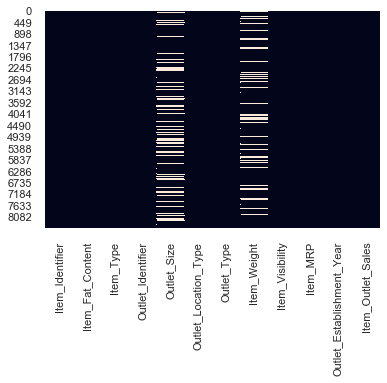

Percentage of Null cells : 
 
               Null_percentage
Outlet_Size            28.28
Item_Weight            17.17


In [28]:
## finding the null values and treating them
heat = sns.heatmap(train.isnull(), cbar=False)
plt.show()
Null_percent = train.isna().mean().round(4)*100

Null_percent = pd.DataFrame({'Null_percentage' : Null_percent})
Null_percent.head()
Null_percent = Null_percent[Null_percent.Null_percentage > 0].sort_values(by = 'Null_percentage', ascending = False)
print("Percentage of Null cells : \n \n " , Null_percent)

From the analysis above we understand that only 2 columns have null values.

Now we will have to take a decision either to keep them and impute or drop them from the data and move ahead.

I prefer dropping a feature if the Percentage of null values in it is greater than 15% . Also we have a small dataset at our disposal.
So, I shall drop these two columns.

In [30]:
print(cat_data.columns)
print(num_data.columns)

cat_data_new = cat_data.drop(['Outlet_Size'], axis =1)
num_data_new = num_data.drop(['Item_Weight'], axis =1) 
cat_data_new.head()
num_data_new.head()

Null_percent_cat = cat_data_new.isna().mean().round(4)*100
print(Null_percent_cat)
Null_percent_num = num_data_new.isna().mean().round(4)*100
print(Null_percent_num)

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')
Item_Fat_Content        0.0
Item_Type               0.0
Outlet_Identifier       0.0
Outlet_Location_Type    0.0
Outlet_Type             0.0
dtype: float64
Item_Visibility              0.0
Item_MRP                     0.0
Outlet_Establishment_Year    0.0
Item_Outlet_Sales            0.0
dtype: float64


Now, we have Null free data. 

Now we shall encode our categorical variables and create dummy variables of them, to get the data ready for modelling.

# Standard scaling and Label Encoding

In [32]:
## loading Standardscaler and OneHotEncoder from Sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Segregating train data into dependent and independent variable dataset

In [33]:
num_data_new.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

Scaling and encoding

In [34]:
## num_data has certain columns with some very high valued columns and some very low, thus we 
#should standardize the values of these columns

y = num_data_new['Item_Outlet_Sales']
num_data_new = num_data_new.drop(['Item_Outlet_Sales'], axis = 1)
print(num_data_new.columns)

for col in num_data_new.columns:
    num_data_new[col] = (num_data_new[col]-num_data_new[col].min())/(num_data_new[col].max() - num_data_new[col].min())
    
num_data_new.head()

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'], dtype='object')


,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.048866,0.927507,0.583333
1,0.058705,0.072068,1.000000
2,0.051037,0.468288,0.583333
3,0.000000,0.640093,0.541667
4,0.000000,0.095805,0.083333


In [35]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data_new.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,Tier 3,Supermarket Type1


In [36]:
# transform categorical columns columns

for i in cat_data_new.loc[:,~cat_data_new.columns.isin(['Outlet_Establishment_Year'])]:
    cat_data_new[i] = le.fit_transform(cat_data_new[i])

cat_data_new.head()
cat_data_new.shape

(8523, 5)

In [37]:
cat_data_new.columns
cat_data_new = pd.get_dummies(cat_data_new, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Location_Type', 'Outlet_Type'])
cat_data_new.head()
cat_data_new.shape

(8523, 35)

In [38]:
x = pd.concat([num_data_new,cat_data_new], axis = 1)
x.head()
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [39]:
## I have an idea, why not convert the Establishment year 
#column to Years of existence by subtracting it by the current year

x['Outlet_Establishment_Year'] = 2020 - x['Outlet_Establishment_Year']

x.rename(columns = {"Outlet_Establishment_Year" : "Years_since"}, inplace = True)
 
x['Years_since'].describe()

count    8523.000000
mean     2019.465339
std         0.348823
min      2019.000000
25%      2019.208333
50%      2019.416667
75%      2019.916667
max      2020.000000
Name: Years_since, dtype: float64

# Now we have the data ready to be modelled

In [40]:
data_dummy = pd.concat([x,y], axis =1)
data_dummy.columns

Index(['Item_Visibility', 'Item_MRP', 'Years_since', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6',
       'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
       'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14',
       'Item_Type_15', 'Outlet_Identifier_0', 'Outlet_Identifier_1',
       'Outlet_Identifier_2', 'Outlet_Identifier_3', 'Outlet_Identifier_4',
       'Outlet_Identifier_5', 'Outlet_Identifier_6', 'Outlet_Identifier_7',
       'Outlet_Identifier_8', 'Outlet_Identifier_9', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Outlet_Sales'],
      dtype='object')

# Applying Regression models

In [41]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data_dummy,test_size=0.20,random_state=2019)
print(train.shape)
print(test.shape)

(6818, 39)
(1705, 39)


In [42]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

We shall apply the following Regression techniques
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Elastic net
5. Stochastic Gradient
6. SVR (Support vector regression)
7. Decision Tree
8. Random Forest
9. Bagging Regression
10. Adaptive Boosting (Ada Boost) 
11. Gradient Boosting

We shall apply Cross Validation to these

In [43]:
# algos to be used
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# evaluating the model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [44]:
model_df = {'Name':['LR', 'Ridge', 'Lasso', 'E_Net','SVR','Dec_Tree','RF','Bagging_Reg','AdaBoost','Grad_Boost'],
             'Model' : [LinearRegression(), Ridge(alpha=0.05,solver='cholesky'), Lasso(alpha=0.01) ,ElasticNet(alpha=0.01,l1_ratio=0.5),
                     SVR(epsilon=15,kernel='linear'),DecisionTreeRegressor(),
                     RandomForestRegressor(),BaggingRegressor(max_samples=70),AdaBoostRegressor(),GradientBoostingRegressor()]}

model_df = pd.DataFrame(model_df)
model_df['Cross_val_score_mean'], model_df['Cross_val_score_STD'] = 0,0
model_df


,Name,Model,Cross_val_score_mean,Cross_val_score_STD
0,LR,"LinearRegression(copy_X=True, fit_intercept=Tr...",0,0
1,Ridge,"Ridge(alpha=0.05, copy_X=True, fit_intercept=T...",0,0
2,Lasso,"Lasso(alpha=0.01, copy_X=True, fit_intercept=T...",0,0
3,E_Net,"ElasticNet(alpha=0.01, copy_X=True, fit_interc...",0,0
4,SVR,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0,0
5,Dec_Tree,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0,0
6,RF,"RandomForestRegressor(bootstrap=True, ccp_alph...",0,0
7,Bagging_Reg,"BaggingRegressor(base_estimator=None, bootstra...",0,0
8,AdaBoost,"AdaBoostRegressor(base_estimator=None, learnin...",0,0
9,Grad_Boost,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...",0,0


Now we have the dataframe of Model and model_names ready. We shall now proceed by training the data on each model using a for loop also in the process extract their cross val score (mean and std) to evaluate the model performance

In [45]:
for m in range(0,model_df.shape[0]):
    print(model_df['Name'][m])
    score=cross_val_score(model_df['Model'][m] , train , train_label , cv=10 , scoring='neg_mean_squared_error')
    score_cross=np.sqrt(-score)
    model_df['Cross_val_score_mean'][m] = np.mean(score_cross)
    model_df['Cross_val_score_STD'][m] = np.std(score_cross)
    
model_df

LR
Ridge
Lasso
E_Net
SVR
Dec_Tree
RF
Bagging_Reg
AdaBoost
Grad_Boost


,Name,Model,Cross_val_score_mean,Cross_val_score_STD
0,LR,"LinearRegression(copy_X=True, fit_intercept=Tr...",1134,32
1,Ridge,"Ridge(alpha=0.05, copy_X=True, fit_intercept=T...",1134,32
2,Lasso,"Lasso(alpha=0.01, copy_X=True, fit_intercept=T...",1134,32
3,E_Net,"ElasticNet(alpha=0.01, copy_X=True, fit_interc...",1136,32
4,SVR,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",1505,40
5,Dec_Tree,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",1536,74
6,RF,"RandomForestRegressor(bootstrap=True, ccp_alph...",1134,34
7,Bagging_Reg,"BaggingRegressor(base_estimator=None, bootstra...",1195,54
8,AdaBoost,"AdaBoostRegressor(base_estimator=None, learnin...",1243,48
9,Grad_Boost,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...",1082,32


In [46]:
model_df.sort_values(by=['Cross_val_score_mean'])

,Name,Model,Cross_val_score_mean,Cross_val_score_STD
9,Grad_Boost,"GradientBoostingRegressor(alpha=0.9, ccp_alpha...",1082,32
0,LR,"LinearRegression(copy_X=True, fit_intercept=Tr...",1134,32
1,Ridge,"Ridge(alpha=0.05, copy_X=True, fit_intercept=T...",1134,32
2,Lasso,"Lasso(alpha=0.01, copy_X=True, fit_intercept=T...",1134,32
6,RF,"RandomForestRegressor(bootstrap=True, ccp_alph...",1134,34
3,E_Net,"ElasticNet(alpha=0.01, copy_X=True, fit_interc...",1136,32
7,Bagging_Reg,"BaggingRegressor(base_estimator=None, bootstra...",1195,54
8,AdaBoost,"AdaBoostRegressor(base_estimator=None, learnin...",1243,48
4,SVR,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",1505,40
5,Dec_Tree,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",1536,74


In the above dataframe we can see the result of our regression models.

- Gradient Boosting technique worked the best. Hence one can try and improve the model and further predict the values of the Test dataset.
